In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
image = cv2.imread('./eye.jpg', cv2.IMREAD_GRAYSCALE)

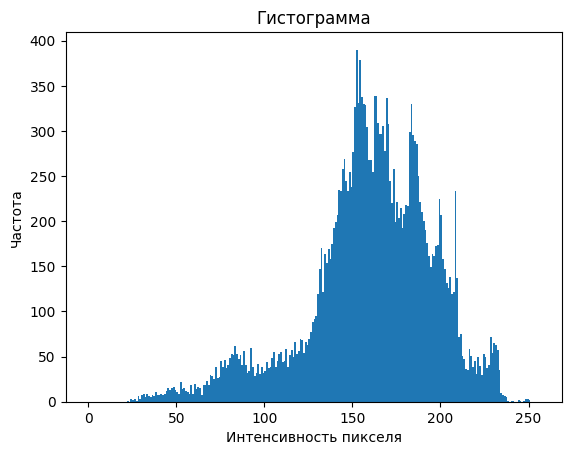

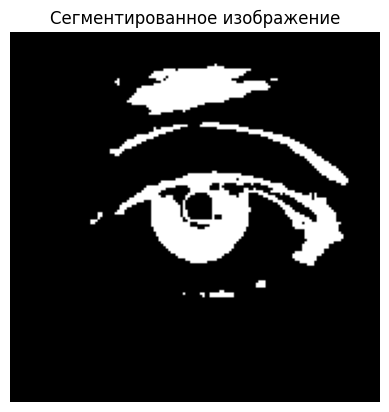

In [4]:
# Отображение гистограммы
plt.hist(image.ravel(), bins=256, range=[0, 256])
plt.title('Гистограмма')
plt.xlabel('Интенсивность пикселя')
plt.ylabel('Частота')
plt.show()

# Определение значений порогов (вы можете изменить их на основе вашего анализа гистограммы)
thresholds = (50, 70, 120)

# Создание бинарной маски на основе порогов
text_segmented = np.zeros_like(image)

# Применение порогов для сегментации изображения
text_segmented[(image > thresholds[0]) & (image <= thresholds[1])] = 255  # Сегментация для 50 < значение <= 70
text_segmented[(image > thresholds[1]) & (image <= thresholds[2])] = 255  # Сегментация для 70 < значение <= 120

# Отображение сегментированного изображения
plt.imshow(text_segmented, cmap='gray')
plt.title('Сегментированное изображение')
plt.axis('off')
plt.show()

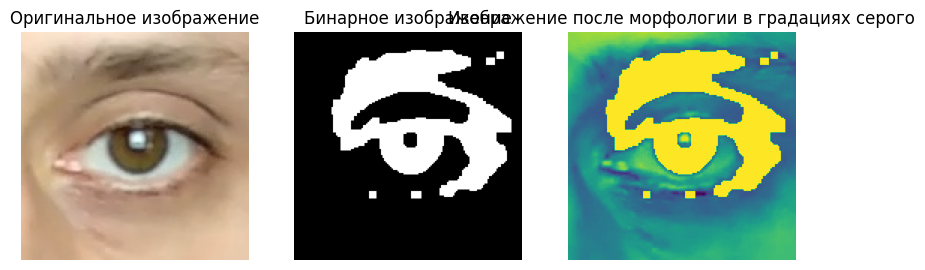

In [13]:
image = cv2.imread('./eye.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Определить сумму пикселей и общее количество точек
total_pixels = gray.size

# Вычислить 1/4 от общего числа пикселей
threshold_value = int(total_pixels / 4)

# Найти пороги для бинаризации
cumulative_sum = 0
thresholds = []

for i in range(256):
    cumulative_sum += hist[i]
    if cumulative_sum >= threshold_value:
        thresholds.append(i)
        if len(thresholds) == 4:  # Получаем 4 порога
            break

# Использовать порог для бинаризации (используем первый порог)
_, binary_image = cv2.threshold(gray, thresholds[0], 255, cv2.THRESH_BINARY_INV)

# Применить морфологические операции для улучшения результата
kernel = np.ones((5, 5), np.uint8)
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Привести бинарное изображение к градациям серого
# Создаем новое изображение с теми же размерами, что и gray
gray_after_morphology = np.zeros_like(gray)

# Задаем значения серого на основе бинарного изображения
gray_after_morphology[binary_image == 255] = 255  # Установить белые пиксели
gray_after_morphology[binary_image == 0] = gray[binary_image == 0]  # Сохранить оригинальные значения серого

# Отобразить результат
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Оригинальное изображение')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Бинарное изображение')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Изображение после морфологии в градациях серого')
plt.imshow(gray_after_morphology)#, cmap='gray')
plt.axis('off')

plt.show()

# versia 2

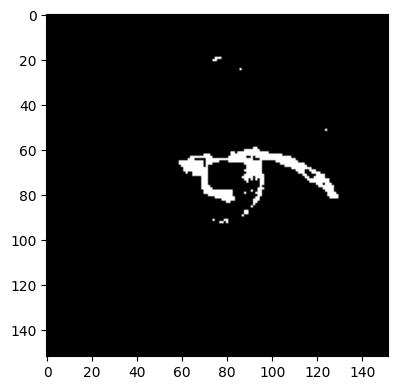

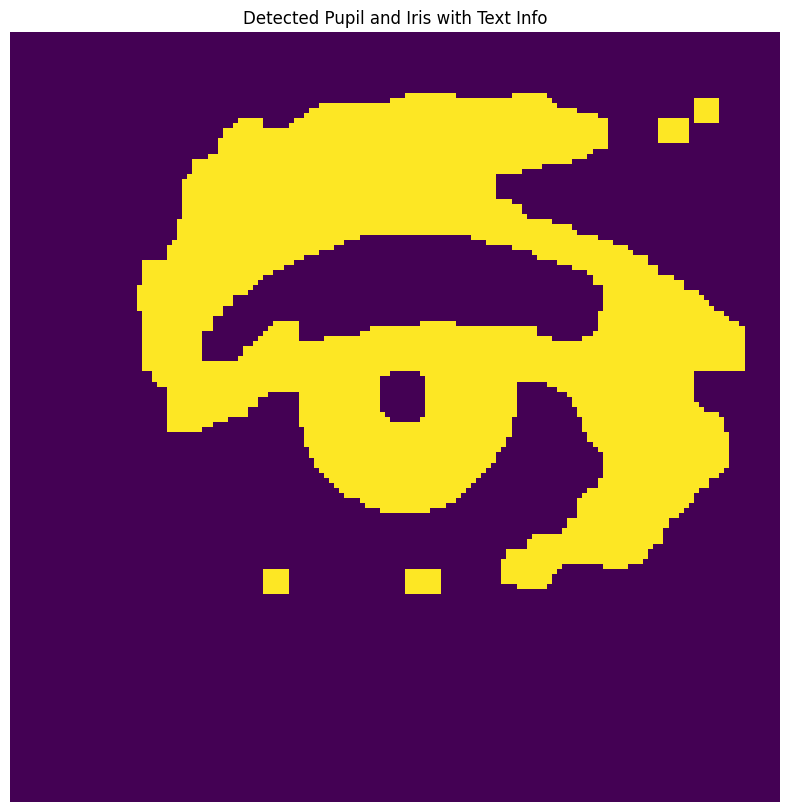

Количество найденных окружностей: 0


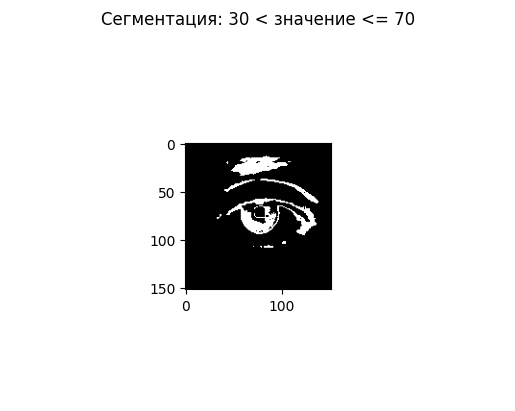

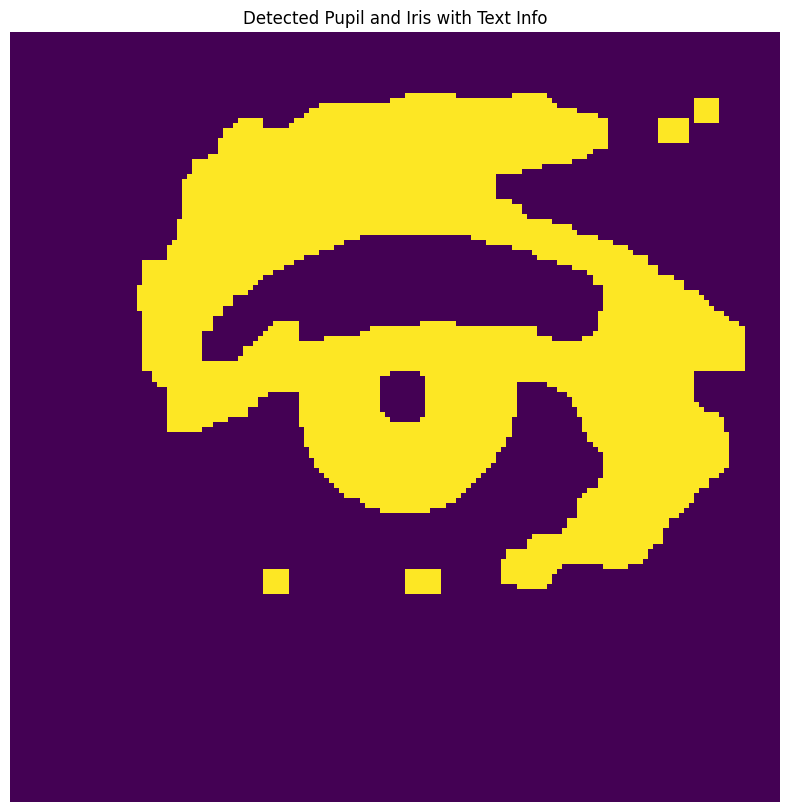

Количество найденных окружностей: 0


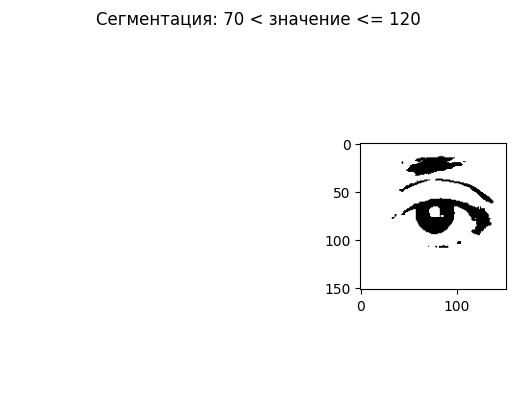

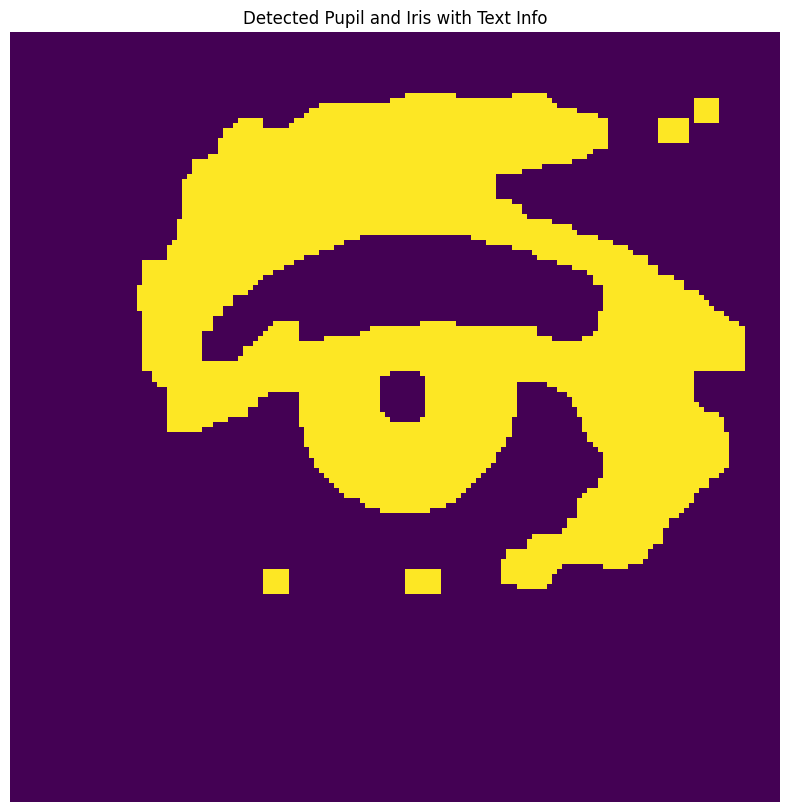

Количество найденных окружностей: 0


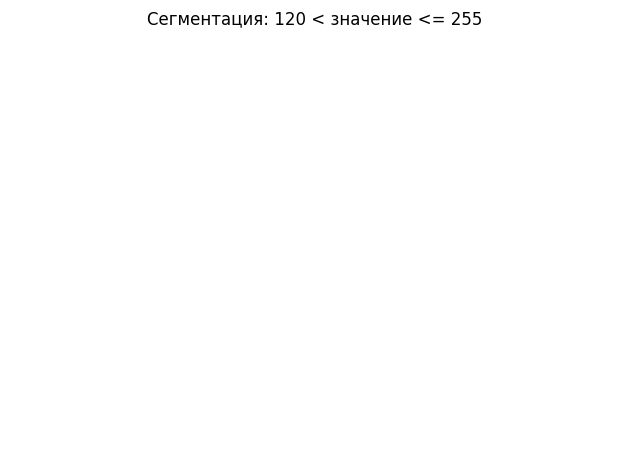

In [11]:
def find_pupil_and_iris(binary_image):
    # Устанавливаем минимальный и максимальный радиус окружностей
    min_radius = 100
    max_radius = 500

    # Применение преобразования Хафа для нахождения окружностей
    circles = cv2.HoughCircles(binary_image, 
                                cv2.HOUGH_GRADIENT, 
                                dp=1, 
                                minDist=20,
                                param1=100,
                                param2=50,  # Увеличение параметра для уменьшения ложных срабатываний
                                minRadius=min_radius, 
                                maxRadius=max_radius)
    
    # Инициализация счетчика кругов
    circle_count = 0
    
    if circles is not None:
        # Преобразование координат окружностей в целые числа
        circles = np.uint16(np.around(circles))
        circle_count = circles.shape[1]  # Общее количество найденных окружностей

        for i in circles[0, :]:
            # Рисуем окружность вокруг найденных объектов
            center = (i[0], i[1])  # центр окружности
            radius = i[2]          # радиус окружности
            
            # Рисуем окружность и ее центр
            cv2.circle(binary_image, center, radius, (255, 0, 255), 15)  # рисуем окружность
            cv2.circle(binary_image, center, 2, (0, 255, 0), 3)      # рисуем центр
            
            # Подготовка текста для отображения
            text = f'Center: {center}, Radius: {radius}'
            cv2.putText(binary_image, text, (center[0] - 50, center[1] - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
            
    return binary_image, circle_count  # Возвращаем изображение и количество кругов

# Определение значений порогов
thresholds = [
    (30, 70),  # Первый уровень сегментации
    (70, 120), # Второй уровень сегментации
    (120, 255) # Третий уровень сегментации
]

# Создание фигуры для отображения изображений
plt.figure(figsize=(15, 5))

# Сегментация и отображение каждого уровня
for i, (low, high) in enumerate(thresholds):
    # Создание бинарной маски
    text_segmented = np.zeros_like(image)
    text_segmented[(image > low) & (image <= high)] = 255

    # Отображение сегментированного изображения
    plt.subplot(1, 3, i + 1)
    plt.imshow(text_segmented, cmap='gray')


    result_image, count = find_pupil_and_iris(binary_image)

    # Отображение результата
    plt.figure(figsize=(10, 10))
    plt.imshow(result_image)
    plt.axis('off')
    plt.title('Detected Pupil and Iris with Text Info')
    plt.show()
    
    # Вывод количества найденных окружностей
    print(f"Количество найденных окружностей: {count}")

    
    plt.title(f'Сегментация: {low} < значение <= {high}')
    plt.axis('off')

# Показать все изображения
plt.tight_layout()
plt.show()


# versia 3

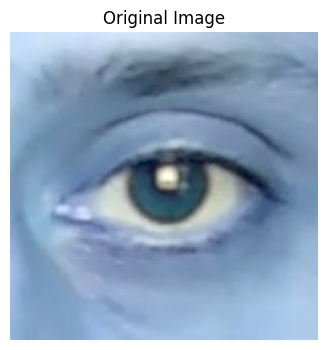

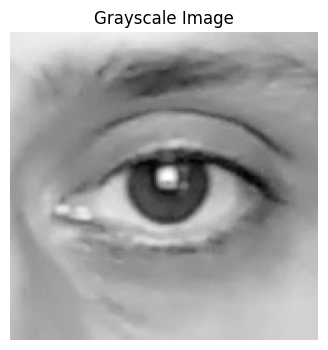

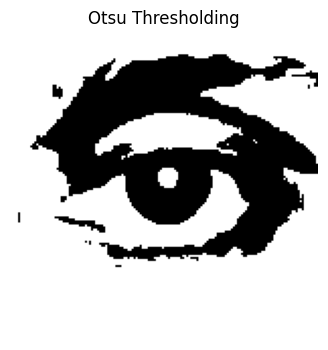

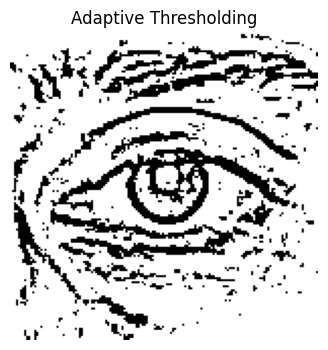

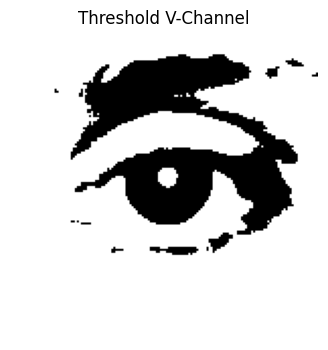

Otsu Threshold Value: 148.0
Manual Threshold Value: 100


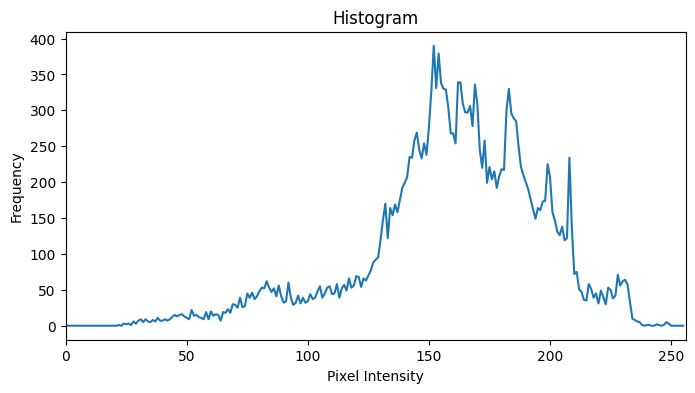

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Функция для отображения изображений
def display_image(title, image, cmap=None):
    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()


# 1. Метод Оцу
_, thresh_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 2. Гистограмма
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# 3. Адаптивная бинаризация
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# 4. Преобразование в HSV и бинаризация по V-каналу
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
v_channel = hsv[:, :, 2]
_, thresh_v = cv2.threshold(v_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 5. Визуализация результатов
display_image('Original Image', image)
display_image('Grayscale Image', gray, cmap='gray')
display_image('Otsu Thresholding', thresh_otsu, cmap='gray')
display_image('Adaptive Thresholding', adaptive_thresh, cmap='gray')
display_image('Threshold V-Channel', thresh_v, cmap='gray')

# 6. Вывод числовых значений порогов
otsu_threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[0]
print(f"Otsu Threshold Value: {otsu_threshold}")

manual_threshold = 100  # Для примера
print(f"Manual Threshold Value: {manual_threshold}")

# Гистограмма
plt.figure(figsize=(8, 4))
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.plot(hist)
plt.show()

# versia 4

Коэффициент корреляции Пирсона: 0.9894


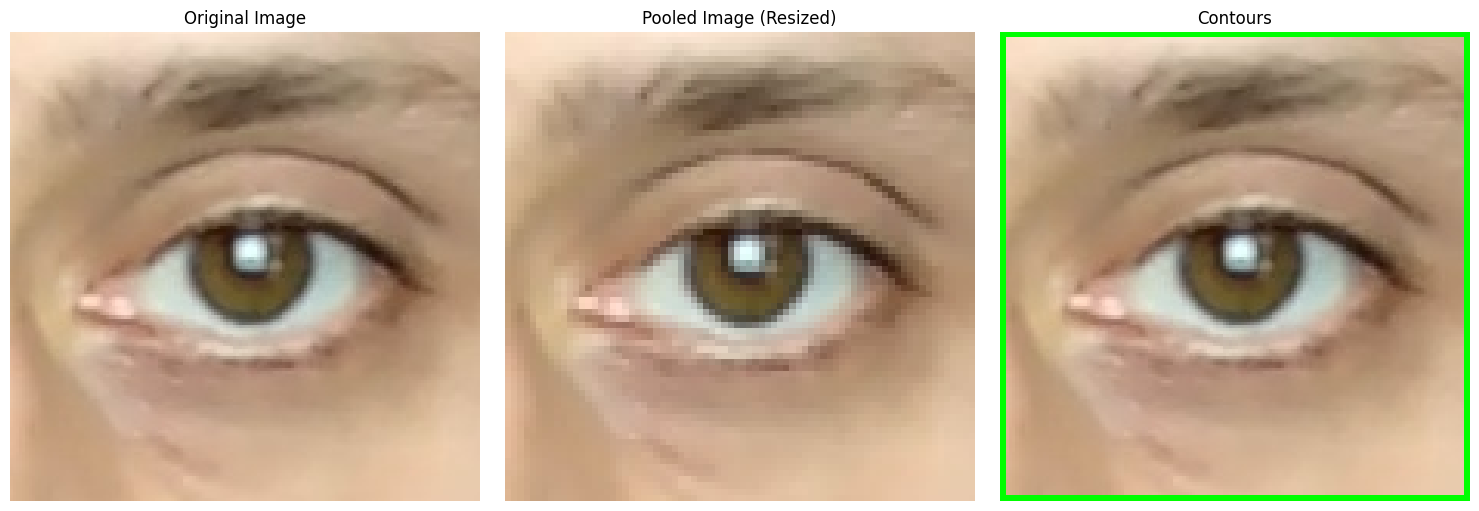

In [15]:
import cv2
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

def apply_max_pooling(image, pool_size=(2, 2)):
    """Применяет максимальное пулинг к изображению."""
    # Выполняем операцию максимального пулинга
    pooled_image = image[::pool_size[0], ::pool_size[1], :]
    return pooled_image

def calculate_pearson_correlation(original, processed):
    """Вычисляет коэффициент корреляции Пирсона между двумя изображениями."""
    # Преобразуем изображения в одномерные массивы
    original_flat = original.flatten()
    processed_flat = processed.flatten()
    
    # Проверка длины массивов
    if len(original_flat) != len(processed_flat):
        raise ValueError("Размерности оригинального и обработанного изображений не совпадают.")
    
    # Вычисляем коэффициент корреляции
    correlation, _ = pearsonr(original_flat, processed_flat)
    return correlation

def find_contours(image):
    """Находит контуры на изображении."""
    # Преобразуем изображение в серый
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Применяем бинаризацию
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    
    # Находим контуры
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

image_path = 'eye.jpg'
original_image = cv2.imread(image_path)

if original_image is None:
    raise ValueError("Изображение не найдено. Проверьте путь к изображению.")

# Применяем максимальное пулинг
pooled_image = apply_max_pooling(original_image)

# Изменим размер обработанного изображения до оригинала для вычисления корреляции
pooled_image_resized = cv2.resize(pooled_image, (original_image.shape[1], original_image.shape[0]), interpolation=cv2.INTER_AREA)

# Вычисляем корреляцию Пирсона
correlation = calculate_pearson_correlation(original_image, pooled_image_resized)
print(f'Коэффициент корреляции Пирсона: {correlation:.4f}')

# Находим контуры
contours = find_contours(original_image)

# Отображаем контуры на исходном изображении
contour_image = original_image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Показать изображения с использованием Matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Pooled Image (Resized)')
plt.imshow(cv2.cvtColor(pooled_image_resized, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Contours')
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

# versia 5